### IDs:
Insert yours IDs to the cell below

ID #1: 203972922

ID #2: 201312907

## Imports

In [372]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import scipy.stats as stats
import seaborn as sns
from scipy.special import comb
from typing import Dict, Tuple
import warnings
import math
import os
warnings.filterwarnings('ignore')

### Prepare The Data Set

In [373]:
def convert_to_numeric(c):
    """
    hellper function for the pre-processing part
    """
    try:
        return pd.to_numeric(c)
    except:
        return c

In [374]:
def pre_processing_csv_file(csv_path):
    """
    read csv file, and preform pre-processing
    """
    first_actual_row = 59  # all previous rows are some irrelevant metadata
    df = pd.read_csv(csv_path, encoding='ISO-8859-1', header=None)
    temp_df = df.drop(df.index[:first_actual_row]).reset_index(drop=True)
    temp_df.dropna(how='any', axis=0)
    df = temp_df.T  # make patients as rows and [Class, IDs, and genes] as columns, for better readability
    column_names = df.iloc[0]  # get column names
    df = df[1:]  # don't include headers row in data
    df.columns = column_names
    df = df.apply(convert_to_numeric)
    df_dtypes = df.dtypes
    return df_dtypes, df

In [375]:
"""
pre-processing data 
"""
# Get path to data file
# Asssumption: data file and notebook are in the same folder
filename = 'AMI_GSE66360_series_matrix.csv'
csv_path = os.path.join(os.getcwd(), filename)

# Preprocess data
df_dtypes, df = pre_processing_csv_file(csv_path)

### print data as DataFrame

In [376]:
df

,Class,ID_REF,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
1,H,GSM1620819,5.866378,8.225790,6.179732,6.179478,2.792048,9.290411,6.998285,5.348944,...,13.257325,13.266235,14.571230,14.276568,4.504659,3.139334,2.747015,2.651554,3.413429,3.140612
2,H,GSM1620820,4.948736,7.525865,6.628137,6.582889,2.695714,9.462275,6.558215,5.410884,...,13.593860,13.517013,14.738834,14.341233,4.409226,3.039961,2.638606,2.643615,3.399063,3.132691
3,H,GSM1620821,5.148384,7.764637,5.859151,6.602135,2.580181,9.116776,6.851623,5.254073,...,13.372759,13.416583,14.627181,14.318568,4.310076,3.220109,2.495261,2.626028,3.539970,3.698396
4,H,GSM1620822,5.064419,7.198461,5.974135,6.545905,2.712124,9.134584,7.357827,5.242140,...,13.490226,13.494827,14.754124,14.363297,4.439311,3.263782,2.544199,2.504958,3.396225,3.638612
5,H,GSM1620823,5.017833,7.831450,6.793079,5.911542,2.723687,9.582344,7.283873,5.219484,...,13.236785,13.330192,14.548389,14.263677,4.562883,3.138524,2.506630,2.609707,3.434720,3.577649
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,M,GSM1620913,6.472517,8.261422,6.367759,6.440978,3.730139,7.355730,6.206879,6.217930,...,6.601746,5.942308,7.290514,8.988511,5.567947,5.558780,5.429437,4.487940,4.254286,5.375811
96,M,GSM1620914,5.678816,6.925753,6.835756,6.955883,2.914868,7.944295,6.638364,5.992344,...,14.271037,14.163706,14.884506,14.792506,4.902195,3.416999,2.834741,2.782356,3.882080,3.744138
97,M,GSM1620915,5.653286,7.918424,7.577035,6.499215,3.013901,8.563123,7.379568,5.766029,...,13.898616,13.682425,14.884506,14.783801,5.239906,3.699181,3.249683,3.056727,3.649827,4.021536
98,M,GSM1620916,6.013841,7.442701,7.147417,6.587065,2.729320,8.699222,6.598350,5.577456,...,13.847006,13.551593,14.858066,14.778166,4.556134,3.485280,2.711413,2.833818,3.523410,3.812564


### print data types as functon of columns

In [377]:
df_dtypes

0
Class               object
ID_REF              object
1007_s_at          float64
1053_at            float64
117_at             float64
                    ...   
AFFX-ThrX-5_at     float64
AFFX-ThrX-M_at     float64
AFFX-TrpnX-3_at    float64
AFFX-TrpnX-5_at    float64
AFFX-TrpnX-M_at    float64
Length: 54677, dtype: object

# 3. Analysis

## 3.a) High level description of the data and some pre-processing

### 3.a.1) How many genes profiled

In [378]:
# amount of genes == (amount of columns minus the two first columns: "Class" & "ID_REF")
amount_of_columns = df.shape[1]
amount_of_non_gene_columns = 2
amount_of_gene_columns = amount_of_columns - amount_of_non_gene_columns
curr_string = 'The amount of genes profiled is ' + str(amount_of_gene_columns)
print(curr_string)

The amount of genes profiled is 54675


### 3.a.2) How many samples (subjects/patients) in total

In [379]:
# amount of patients == amount of rows
amount_of_rows = df.shape[0]
curr_string = 'The amount of samples (subjects/patients) in total is ' + str(amount_of_rows)
print(curr_string)

The amount of samples (subjects/patients) in total is 99


### 3.a.3) How many samples in each class?

In [380]:
count_df = df['Class'].value_counts()
print(count_df)

H    50
M    49
Name: Class, dtype: int64


Text(0.5, 1.0, 'Histogram of amount class')

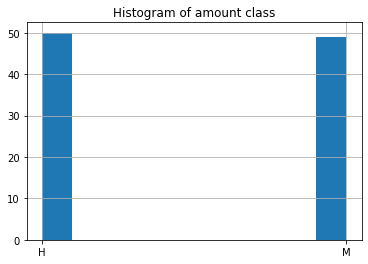

In [381]:
hist = df['Class'].hist()
plt.title('Histogram of amount class')

### 3.a.4) If there are missing values, then remove the entire row (gene) from the data matrix. How many rows left now?

In [382]:
# Note: we transposed the matrix, and so each gene is now represented as a column and not a row.
initial_amount_of_gene_columns = amount_of_gene_columns

# we remove all columns (genes) with missing values
df.dropna(axis='columns', inplace=True) # Removing columns with missing values

# get new amount of gene columns
new_amount_of_columns = df.shape[1]
assert 'Class' in df.columns
assert 'ID_REF' in df.columns
new_amount_of_gene_columns = new_amount_of_columns - amount_of_non_gene_columns  # we know that the non-gene columns persisted

# get amount of columns removed
amount_of_columns_with_missing_values = initial_amount_of_gene_columns - new_amount_of_gene_columns

# print
print(f'Original amount of columns {amount_of_columns}')
print(f'Original amount of gene columns {initial_amount_of_gene_columns}')
print(f'Amount of columns removed is {amount_of_columns_with_missing_values}')
print(f'New amount of columns {new_amount_of_columns}')
print(f'New amount of gene columns {new_amount_of_gene_columns}')

Original amount of columns 54677
Original amount of gene columns 54675
Amount of columns removed is 47
New amount of columns 54630
New amount of gene columns 54628


### print data as DataFrame after removing of columns

In [383]:
df

,Class,ID_REF,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
1,H,GSM1620819,5.866378,8.225790,6.179732,6.179478,2.792048,9.290411,6.998285,5.348944,...,13.257325,13.266235,14.571230,14.276568,4.504659,3.139334,2.747015,2.651554,3.413429,3.140612
2,H,GSM1620820,4.948736,7.525865,6.628137,6.582889,2.695714,9.462275,6.558215,5.410884,...,13.593860,13.517013,14.738834,14.341233,4.409226,3.039961,2.638606,2.643615,3.399063,3.132691
3,H,GSM1620821,5.148384,7.764637,5.859151,6.602135,2.580181,9.116776,6.851623,5.254073,...,13.372759,13.416583,14.627181,14.318568,4.310076,3.220109,2.495261,2.626028,3.539970,3.698396
4,H,GSM1620822,5.064419,7.198461,5.974135,6.545905,2.712124,9.134584,7.357827,5.242140,...,13.490226,13.494827,14.754124,14.363297,4.439311,3.263782,2.544199,2.504958,3.396225,3.638612
5,H,GSM1620823,5.017833,7.831450,6.793079,5.911542,2.723687,9.582344,7.283873,5.219484,...,13.236785,13.330192,14.548389,14.263677,4.562883,3.138524,2.506630,2.609707,3.434720,3.577649
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,M,GSM1620913,6.472517,8.261422,6.367759,6.440978,3.730139,7.355730,6.206879,6.217930,...,6.601746,5.942308,7.290514,8.988511,5.567947,5.558780,5.429437,4.487940,4.254286,5.375811
96,M,GSM1620914,5.678816,6.925753,6.835756,6.955883,2.914868,7.944295,6.638364,5.992344,...,14.271037,14.163706,14.884506,14.792506,4.902195,3.416999,2.834741,2.782356,3.882080,3.744138
97,M,GSM1620915,5.653286,7.918424,7.577035,6.499215,3.013901,8.563123,7.379568,5.766029,...,13.898616,13.682425,14.884506,14.783801,5.239906,3.699181,3.249683,3.056727,3.649827,4.021536
98,M,GSM1620916,6.013841,7.442701,7.147417,6.587065,2.729320,8.699222,6.598350,5.577456,...,13.847006,13.551593,14.858066,14.778166,4.556134,3.485280,2.711413,2.833818,3.523410,3.812564


### 3.a.5) Pick 20 genes at random. Draw 20 pair boxplots in one figure comparing expression levels of each of these genes in the two classes M and H.

In [384]:
columns_list = df.columns.to_list()

def generate_pair_box_plot():
    """
    Generated pair box plot to N gens
    each figure has 2 box plot, one for each class
    """
    BINS = 10
    N_genes = 20
    # starting from index 2 which is the first gene (0 is "Class" and 1 is "ID")
    random_indices = np.random.randint(low=2, high=df.shape[1], size=N_genes)
    for ax_ind, i in enumerate(random_indices):
        plt.figure()
        curr_columns = columns_list[i]
        ax1 = sns.boxplot(x="Class", y=curr_columns, data=df)
        ax1 = sns.swarmplot(x="Class", y=curr_columns, data=df, color=".25")

        gene_name = curr_columns
        ax1.set_title(f'Pair Boxplot of Gene: {gene_name}\n  **Myocardial Infraction** vs **Healthy** of patients')
    return

In [385]:
def generate_pair_box_plot_new(df: pd.DataFrame):
    df_20_random_features = df.sample(20, axis=1)
    df_20_random_features['label'] = df['Class']

    df_long = pd.melt(df_20_random_features, 'label', var_name="Gene Name", value_name="Gene Exp Value")
    df_long['Gene Expression Value'] = df_long['Gene Exp Value'].astype(float)

    plt.figure(0, figsize=(15,15))
    sns.boxplot(y="Gene Name", x="Gene Expression Value", hue='label', data=df_long, orient="h")
    plt.show()

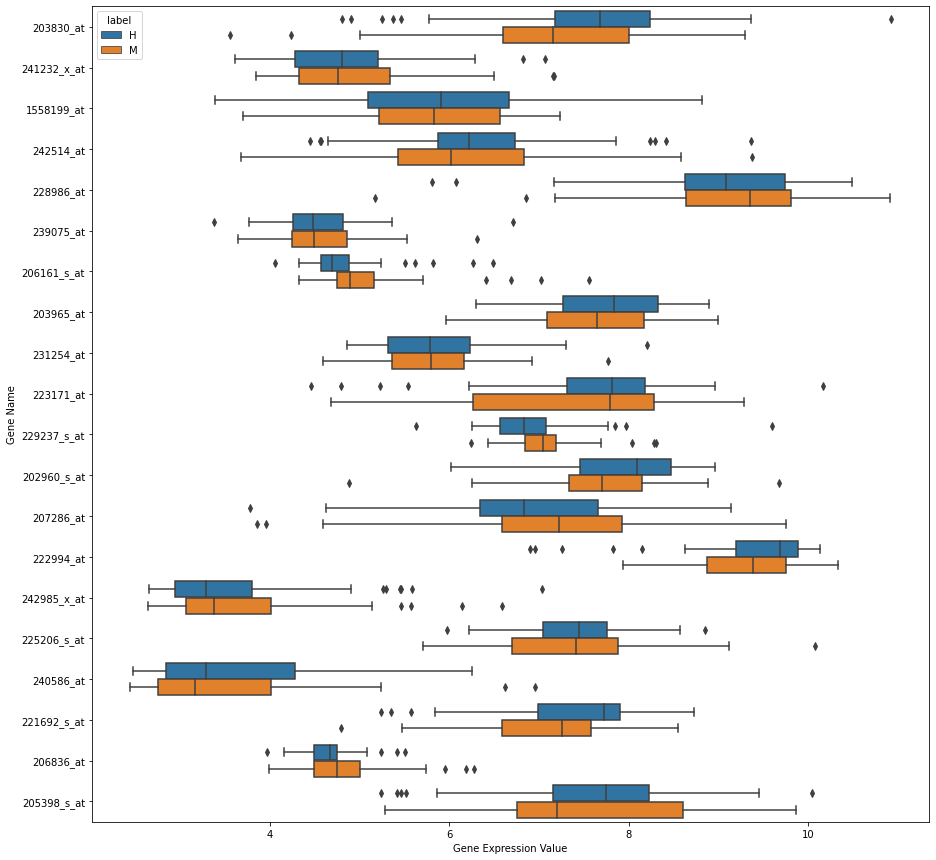

In [386]:
# generate_pair_box_plot()
generate_pair_box_plot_new(df)

## 3.b) WRS for differential expression (DE)

### 3.b.1) Consider some gene, g. Under the null model (which assumes that for g there is no M vs H DE), what is the expected sum of ranks of g’s expression levels measured for samples labeled M?

##### Answer:
* we know from our lecture that: <br>
$B =|M| +|H|$<br> 
$\mu_T = \frac{|M|(B+1)}{2}$
* now we will show the calculation

In [387]:
H_samples = df.loc[df['Class'] == 'H']
M_samples = df.loc[df['Class'] == 'M']

H_samples_count = len(H_samples)
M_samples_count = len(M_samples)

B = H_samples_count + M_samples_count
excepted_mue_T = ((M_samples_count)*(B+1))/(2)
curr_string = 'The Excepted value is ' + str(excepted_mue_T)
print(curr_string)

The Excepted value is 2450.0


### 3.b.2) Denote this sum of ranks by RS(g). What is the maximal value, c, that RS(g) can take?

##### Answer:
* The maximal RS value will be recieved when all of the H sampels are ranked above the samples with.
* this means all H samples will recieve the first |H| ranks, and all the rest of the ranks wil go to the M samples

In [388]:
maximum_R_s = np.sum(np.arange(H_samples_count+1, B+1))
curr_string = 'The Maximum RS value is ' + str(maximum_R_s)
print(curr_string)

The Maximum RS value is 3675


### 3.b.3) Under the null model, what is the probability of RS(g) = c? (Provide a formula for this and explain it)

#### Answer:
* note that this is combination order problem, however there is only one option
    to order the value of M sampels and H samples
* P(A) = What is the probability that a specific example is in A
* $n(A)$ - is the number of option to order ellements from M class:
    * $n(A) = |M|!$
* $\Omega$ - total number of outcomes (the probability sample space)
    * B = |M|+|H|
    * Total number of options, $\Omega = {B \choose |M|} |M|!$
* $P(A) = \frac {n(A)}{\Omega}$ 
$$P\big(RS(g) = c\big) = \frac {|M|!}{{B \choose |M|} |M|!} = \frac {1}{{B \choose |M|}} = \frac {1}{{99 \choose 49}}$$


In [389]:
denominator = comb(B, M_samples_count, exact=True)
probability = 1 / denominator
print(f'P(RS(g)=c) = {probability}')

P(RS(g)=c) = 1.9823306042836678e-29


### 3.b.4) Under the null model, what is the probability of RS(g) = c-1? what is the probability of RS(g) = c-2? (provide formulas and explain them)

* in the two cases the $\Omega$ is not changing
* equations will be:
$$P\big(RS(g) = c-1\big) = \frac {1\cdot|M|!}{{B \choose |M|} |M|!} $$
$$P\big(RS(g) = c-2\big) = \frac {2\cdot|M|!}{{B \choose |M|} |M|!} $$

In [430]:
denominator = comb(B, M_samples_count, exact=True)
probability_case1 = math.factorial(1) / denominator
print(f'P(RS(g)=c-1) = {probability_case1}')

P(RS(g)=c-1) = 1.9823306042836678e-29


In [431]:
denominator = comb(B, M_samples_count, exact=True)
probability_case2 = math.factorial(2) / denominator
print(f'P(RS(g)=c-2) = {probability_case2}')

P(RS(g)=c-2) = 3.9646612085673355e-29


### 3.b.5) Draw a histogram of the values of RS(g) in the dataset. Here g ranges over all genes in the data (after the clean-up). Compute the IQR for this distribution and present it on the plot with the histogram

In [392]:
def calculate_RS_for_each_gene(gene):
    """
    Calculate the RS sum for a single gene
    """
    # get ranks of all samples for this gene g
    ranks = gene.rank()
    # sum of the ranks of ONLY the 'M' samples for this gene g
    M_samples = df['Class'] == 'M'
    ranks_sums = ranks[M_samples].sum()
    return ranks_sums

In [393]:
def generate_RS_histogram(df):
    """
    generate for each gene RS value and generated histogram
    to those value, and calculate the IQR
    """
    
    # general plot defs.
    plt.figure(0, figsize=(10,10))
    plt.title('histogram RS(g) vs samples labeled M')
    plt.ylabel('Count')
    plt.xlabel('RS(g) Value')
    
    # generate RS value for each gene
    ranked_sum_series = df.iloc[:, 2:].apply(calculate_RS_for_each_gene, axis=0)
    
    # plot histogram
    sns.histplot(ranked_sum_series)
    
    # calculate IQR
    distribution_iqr = stats.iqr(ranked_sum_series)
    
    # plot IQR
    plt.axhline(y=distribution_iqr, color='r', linestyle='-', label='IQR')
    max_y = plt.gca().get_ylim()[1]
    min_x = plt.gca().get_xlim()[0]
    plt.text(min_x * 1.05, max_y * 0.9, f'IQR: {distribution_iqr}', color='r', size=15, bbox=dict(facecolor='y', alpha=0.7))
    
    # Finally, show
    plt.show()

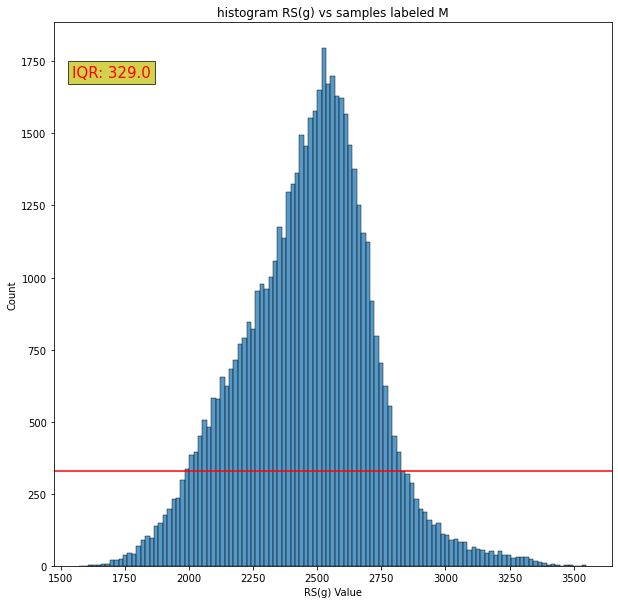

In [394]:
generate_RS_histogram(df)

## 3.c) Differential Expression

### 3.c) The purpose is to determine the statistical significance of differential expression (DE) observed for each gene in H vs M. 
* Evaluate the DE in both one-sided directions for every gene, using both Student t-test and WRS test. 
* Report the number of genes overexpressed in M vs H at a p-value better (≤) than 0.07 and separately genes underexpressed in M vs H at a p-value of 0.07. 
* For both directions use both a Student ttest and a WRS test.

### Student T-Test

In [395]:
def calculate_t_test(g):
    """
    Calculate the T-test for the means of two 
    independent samples of scores
    """
    # this is the one Zohar mentioned in class
    M_samples = df['Class'] == 'M'
    H_samples = df['Class'] == 'H'
    return stats.ttest_ind(g[M_samples], g[H_samples], equal_var=True)

In [396]:
alpha = 0.07 # certainty of 93%

"""
starting from index 2 which is the first gene
(0 is "Class" and 1 is "ID")
"""
# for each gene calulate t-test and p-value
t_test_df = df.iloc[:,2:].apply(calculate_t_test, axis=0, result_type='expand')
t_test_df.index=['t_test', 'p-value']
t_test_df = t_test_df.T

In [397]:
t_test_df

,t_test,p-value
0,,
1007_s_at,-1.278585,0.204094
1053_at,0.447602,0.655439
117_at,4.041393,0.000106
121_at,0.102599,0.918493
1255_g_at,0.481005,0.631596
...,...,...
AFFX-ThrX-5_at,1.108412,0.270425
AFFX-ThrX-M_at,0.961627,0.338628
AFFX-TrpnX-3_at,1.051736,0.295534


In [398]:
t_test_values = t_test_df['t_test'] # The calculated t-statistic
t_test_p_values = t_test_df['p-value'] / 2  # Since "ttest_ind()" returns the 2-tailed p-value of the test, we divide the values by 2 ("...a two-sided test for the null hypothesis")

t_test_overexpressed_genes_df = t_test_df[(t_test_values > 0) & (t_test_p_values <= alpha)]
t_test_underexpressed_genes_df = t_test_df[(t_test_values <= 0) & (t_test_p_values <= alpha)]

In [399]:
t_test_underexpressed_genes_df

,t_test,p-value
0,,
1316_at,-2.885473,0.004817
1405_i_at,-2.154836,0.033650
1431_at,-4.055713,0.000101
1552277_a_at,-2.952385,0.003955
1552280_at,-2.036412,0.044435
...,...,...
65472_at,-2.446916,0.016208
65585_at,-3.430729,0.000886
81811_at,-2.070764,0.041037


In [400]:
t_test_overexpressed_genes_df

,t_test,p-value
0,,
117_at,4.041393,0.000106
1320_at,2.406316,0.018008
1552276_a_at,2.210267,0.029438
1552289_a_at,1.491806,0.138995
1552293_at,2.123148,0.036287
...,...,...
AFFX-M27830_5_at,1.946407,0.054499
AFFX-M27830_M_at,1.822695,0.071430
AFFX-PheX-3_at,1.575338,0.118434


### WRS

In [401]:
def calculate_WRS(g):
    """
    Calculate the WRS for two 
    independent samples of scores
    """
    M_samples = df['Class'] == 'M'
    H_samples = df['Class'] == 'H'
    return stats.ranksums(g[M_samples], g[H_samples])

In [402]:
"""
starting from index 2 which is the first gene 
(0 is "Class" and 1 is "ID")
"""
# for each gene calulate WRS and p-value base this methood 
WRS_df = df.iloc[:,2:].apply(calculate_WRS, axis=0, result_type='expand')
WRS_df.index=['WRS Z Value', 'p-value']
WRS_df_copy = WRS_df.copy()
WRS_df = WRS_df.T

In [403]:
WRS_df

,WRS Z Value,p-value
0,,
1007_s_at,-1.021787,0.306882
1053_at,1.077775,0.281134
117_at,4.290106,0.000018
121_at,0.629869,0.528780
1255_g_at,1.035784,0.300303
...,...,...
AFFX-ThrX-5_at,2.281525,0.022517
AFFX-ThrX-M_at,2.204541,0.027486
AFFX-TrpnX-3_at,1.574672,0.115332


In [404]:

WRS_Z_values = WRS_df['WRS Z Value'] # The test statistic under the large-sample approximation that the rank sum statistic is normally distributed
WRS_p_values = WRS_df['p-value'] / 2  # Since "ranksums()" returns the 2-sided p-value of the test, we divide the values by 2

WRS_overexpressed_genes_df = WRS_df[(WRS_Z_values > 0) & (WRS_p_values < alpha)]
WRS_underexpressed_genes_df = WRS_df[(WRS_Z_values <= 0) & (WRS_p_values < alpha)]


In [405]:
WRS_overexpressed_genes_df

,WRS Z Value,p-value
0,,
117_at,4.290106,0.000018
1320_at,1.686649,0.091671
1552271_at,1.784628,0.074322
1552276_a_at,2.351510,0.018697
1552279_a_at,1.728640,0.083874
...,...,...
AFFX-ThrX-3_at,2.365507,0.018005
AFFX-ThrX-5_at,2.281525,0.022517
AFFX-ThrX-M_at,2.204541,0.027486


In [406]:
WRS_underexpressed_genes_df

,WRS Z Value,p-value
0,,
1294_at,-1.679650,0.093025
1316_at,-3.079359,0.002074
1405_i_at,-2.918392,0.003518
1431_at,-3.681233,0.000232
1552277_a_at,-2.547469,0.010851
...,...,...
78383_at,-1.616663,0.105951
81811_at,-2.736430,0.006211
91617_at,-2.183545,0.028996


## 3.d) Correlations

### 3.d) Select the 80 most significant genes from each one of the onesided WRS DE lists you computed in 3c. Generate a set of 160 genes, D, which is the union of the above two sets.

In [407]:
"""
NOTE that the genes with smaller p values are more significant
we will choose the 80 most significant (smallest) genes from each one of the one-sided WRS DE 
"""
# Number of genes in each group
n = 80

# Generate dataframes with the n most significant p-values
overexpressed_n_significant_df = WRS_overexpressed_genes_df.sort_values(by='p-value').head(n) # sorting by the p-values
underexpressed_n_significant_df = WRS_underexpressed_genes_df.sort_values(by='p-value').head(n)

# Generate a set of 160 genes, D, which is the union of the above two dataframes
most_significant_df  = pd.concat([overexpressed_n_significant_df, underexpressed_n_significant_df])

# Filter the original dataframe - and keep only the chosen genes from above  
most_significant_df = df[most_significant_df.index]

In [408]:
most_significant_df.shape

(99, 160)

### 3.d.1) Compute Kendall 𝜏 correlations in all pairs within D (160 choose 2 numbers). Represent the correlation matrix as a 160x160 heatmap.

In [409]:
D_kendall_correlations_df = most_significant_df.corr(method='kendall') 
D_kendall_correlations_df.shape

(160, 160)

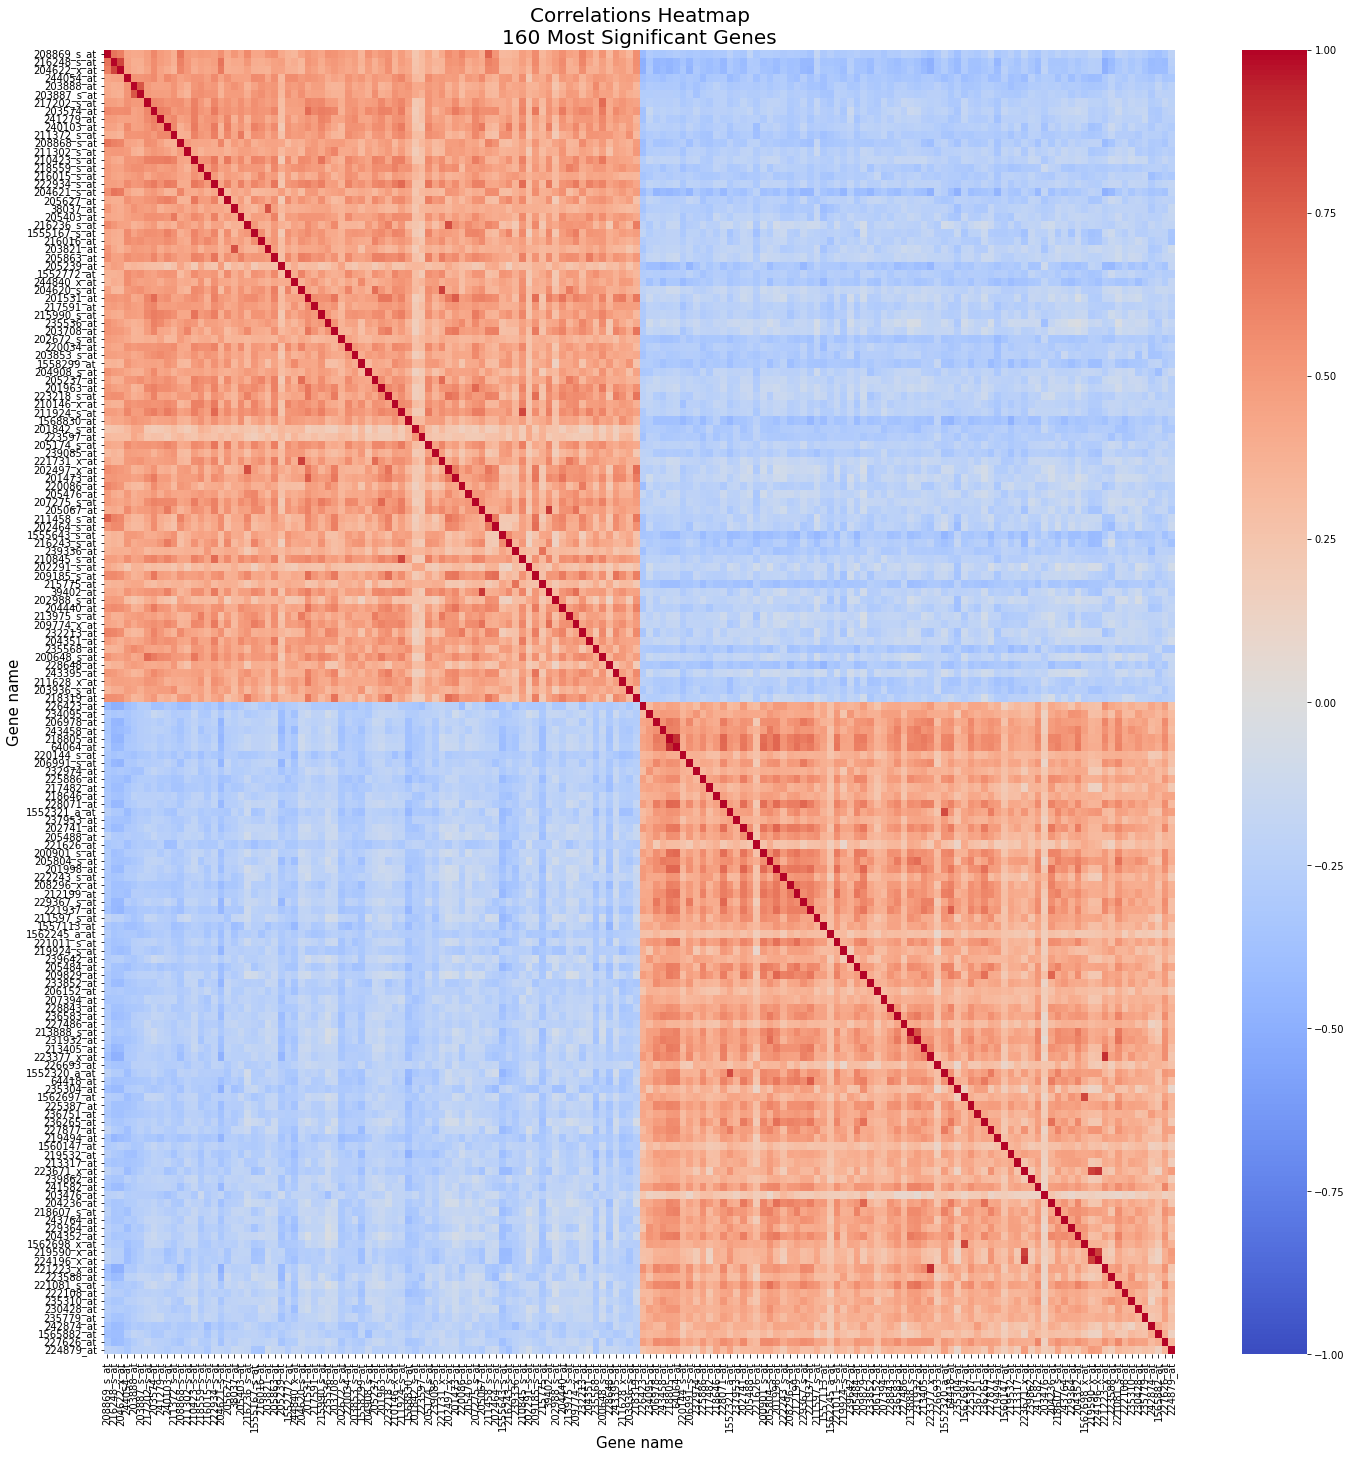

In [410]:
plt.figure(0, figsize = (24,24))
sns.heatmap(D_kendall_correlations_df, cmap="coolwarm", vmin=-1, vmax=1, xticklabels=True, yticklabels=True)
plt.title('Correlations Heatmap\n160 Most Significant Genes', fontsize=20)
plt.xlabel('Gene name', fontsize=15)
plt.ylabel('Gene name', fontsize=15)
plt.show()

### 3.d.2) Under a NULL model that assumes that genes are pairwise independent, what is the expected value for 𝜏?

#### Answer:
* First, we note for the heatmap above that the correlation between overly expressed genes and themselves is very high, and the correlation between underexpressed genes and themselves is also very high. But, the correlation between the underexpressed genes and the over expressed genes is very low.
* Under a NULL model that assumes that genes are pairwise independent the expected value for 𝜏 would be close to 0.
* Intuition: the mean of all pairs of genes will cancel each other (i.e, the amount of strongly positive correlated pairs will be close to the amount of strongly negative correlated pairs, with about the same intensity on both sides - as can be seen in the heatmap), bringing the end mean close to 0. we can see this strongly later on with the histogram.

In [411]:
# the excepted kendall value is the mean of all kendal values
kendall_mean = np.mean(D_kendall_correlations_df.mean())

curr_string = 'The kendall correlation mean of the D samples is ' + str(kendall_mean)
print(curr_string)

The kendall correlation mean of the D samples is 0.09016181231892698


### 3.d.3) Now compute the Kendall tho correlations in all 80 choose 2 pairs from the overexpressed genes in D. Present your results on a histogram. What is the average value you observed? Compare it to the value in the above section. Explain.

In [412]:
# Number of genes
n = 80

D_only_overexpressed_df = WRS_overexpressed_genes_df.sort_values(by='p-value').head(n)
D_kendall_correlations_only_overexpressed_df = df[D_only_overexpressed_df.index].corr(method='kendall') 

In [413]:
D_kendall_correlations_only_overexpressed_df.shape

(80, 80)

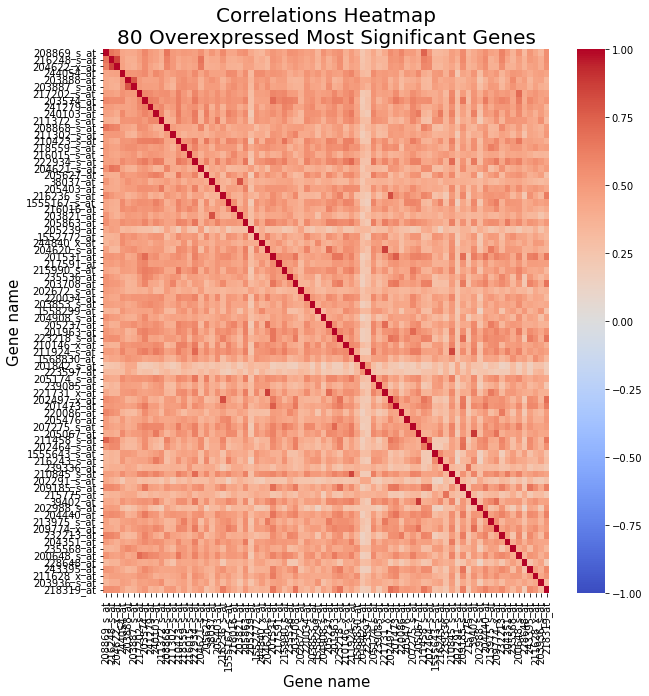

In [414]:
# First, we will plot a heatmap to show that these are indeed the overexpressed genese in D as shown before
plt.figure(0, figsize = (10,10))
sns.heatmap(D_kendall_correlations_only_overexpressed_df, cmap="coolwarm", vmin=-1, vmax=1, xticklabels=True, yticklabels=True)
plt.title('Correlations Heatmap\n80 Overexpressed Most Significant Genes', fontsize=20)
plt.xlabel('Gene name', fontsize=15)
plt.ylabel('Gene name', fontsize=15)
plt.show()

In [415]:
# We dont want gene pairs to appear twice, so get only the bottom left triangle
kendall_correlations_list_unique_pairs_only_overexpressed = D_kendall_correlations_only_overexpressed_df.to_numpy()[np.tril_indices(n, k = -1)]

# Calculate kendal mean for the overexpressed genes only
mean_kendal_score = np.mean(kendall_correlations_list_unique_pairs_only_overexpressed)
print(f'mean kendall score for overexpressed only: {mean_kendal_score}')

mean kendall score for overexpressed only: 0.43633375511448963


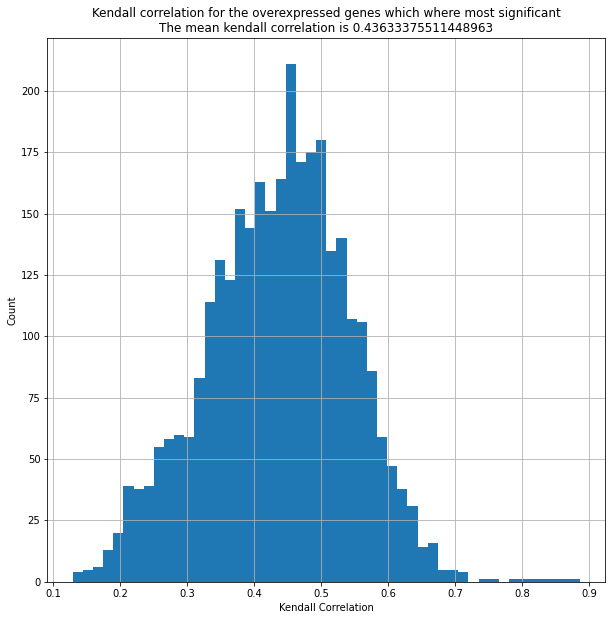

In [416]:
plt.figure(0, figsize = (10, 10))
plt.hist(kendall_correlations_list_unique_pairs_only_overexpressed, bins=50)
plt.title('Kendall correlation for the overexpressed genes which where most significant\nThe mean kendall correlation is ' + str(mean_kendal_score))
plt.xlabel('Kendall Correlation')
plt.ylabel('Count')
plt.grid()

#### Answer:
* We saw in the previous section that the mean of the most significant genes correlations' was supposed to be close to 0, yet we got ~0.43 here.
* This can be explained becuase here we only took into acount the correlations of over expressed genes paired with themselves , and we saw that they have positive correlations between themselvs.
* the correlations of these genes with the under expressed genes which we have neglected be negative correlations - and so when averaging, they will cancel each other out. 
* please  see the next parts of this question 

### 3.d.4) What can you report about co-expression of genes in D (coexpression is inferred from the correlation of the expression levels of genes, across a set of samples)?

In [417]:
# We dont want gene pairs to appear twice, so get only the bottom left triangle
kendall_correlations_list_unique_pairs = D_kendall_correlations_df.to_numpy()[np.tril_indices(2*n, k = -1)]

# Calculate kendal mean for the overexpressed genes only
mean_kendal_score = np.mean(kendall_correlations_list_unique_pairs)
print(f'mean kendall score: {mean_kendal_score}')

mean kendall score: 0.08443955956621585


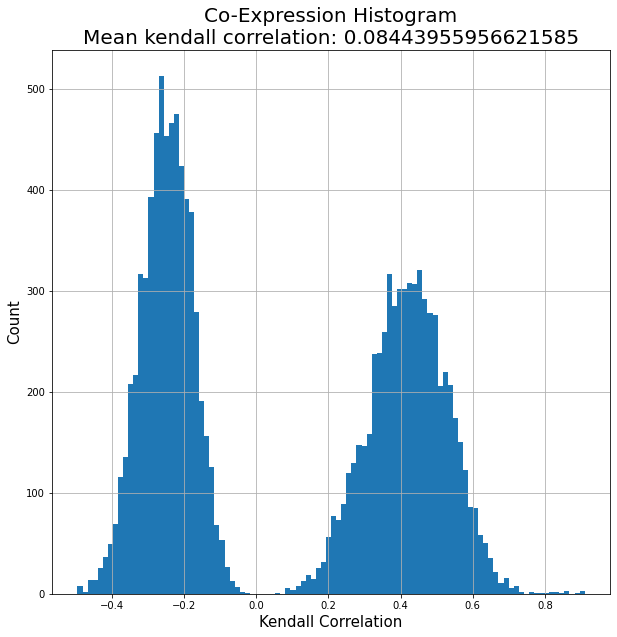

In [418]:
plt.figure(0, figsize = (10, 10))
plt.hist(kendall_correlations_list_unique_pairs, bins=100)
plt.title(f'Co-Expression Histogram\nMean kendall correlation: {mean_kendal_score}', fontsize=20)
plt.xlabel('Kendall Correlation', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.grid()
plt.show()

#### Answer (Report):

* From the heatmap a few cell blocks above we can see that there is a strong positive co-expression among the overexpressed genes and also among the underexpressed genes.
* In the histogram these are probably in the right gaussian
* We expect that M's expression levels will be higher than H's. This might mean that there will be more will be concordant pairs. 
* And so, For (M, H) pairs we expect concordancy, and for (H, H) and (M, M) we expect less concordancy. <br>

### 3.d.5) What can you say about how many co-expressed pairs we would observe (in the entire dataset) at FDR=0.05? Explain your answer.

In [419]:
def get_kendall_correlations_and_pvalues(df: pd.DataFrame) -> dict:
    print(f'Computing Kendall correlations and p-values...')
    result = dict()

    for gene1 in df.columns:
        for gene2 in df.columns:
            
            # Avoid replications between the same gene pairs
            if gene1 == gene2:
                continue
            if (gene1, gene2) in result.keys() or (gene2, gene1) in result.keys(): 
                continue
                
            # If we got here, this is not a duplicate
            corr_value, p_value = stats.kendalltau(df[gene1], df[gene2])
            result[(gene1, gene2)] = {'corr_value':corr_value, 'p_value':p_value}
    
    return result

In [420]:
def compute_fdr(sorted_pvals:list, fdr_threshold:float=0.05):
    """
    calculate FDR 
    """
    print(f'Computing FDR...')
    N = len(sorted_pvals) 
    max_amount_of_coexpressed_genes_with_fdr_below_threshold = 1
    for i, pval in enumerate(sorted_pvals, start=1):
        fdr = (pval * N) / i

        if fdr <= fdr_threshold:
            max_amount_of_coexpressed_genes_with_fdr_below_threshold = i
    
    return max_amount_of_coexpressed_genes_with_fdr_below_threshold

In [421]:
# Given threshold for fdr
fdr_threshold = 0.05


# Calculate p-values for coexpressed genes
kendall_correlations_and_pvalues = get_kendall_correlations_and_pvalues(most_significant_df)   #most_significant_df  #only_genes_df ->. only_genes_df = df.drop(columns=['Class','ID_REF'])
assert len(kendall_correlations_and_pvalues) == comb(160, 2, exact=True)

# Get pvals
coexpressed_pvals = np.array([value['p_value'] for key, value in kendall_correlations_and_pvalues.items() if value['corr_value'] > 0])  # consider adding condition: if value['corr_value'] > 0
sorted_coexpressed_pvals = np.sort(coexpressed_pvals)

# Compute FDR
max_amount_of_coexpressed_genes_with_fdr_below_threshold = compute_fdr(sorted_pvals=sorted_coexpressed_pvals, fdr_threshold=fdr_threshold)

print(f'There are {len(kendall_correlations_and_pvalues)} possible coexpressed pairs of genes from D')
print(f'We can report {max_amount_of_coexpressed_genes_with_fdr_below_threshold} coexpressed pairs of genes in FDR {fdr_threshold}')

Computing Kendall correlations and p-values...
Computing FDR...
There are 12720 possible coexpressed pairs of genes from D
We can report 6291 coexpressed pairs of genes in FDR 0.05


### 3.d.6) What would have been advantages and disadvantages of computing co-expression for all genes in the study rather than only for genes in D?

#### Computing coexpression for all genes is similar to implementing a brute force approach - and so studying only the genes in D is equivalent to a more fine and samrt approach.
* The main advantage of computing coexpression for all genes in the study comes from the exhaustive nature of looking into all possible different gene pairs - it is the most certain approach to finding every possible piece of information regariding the data. This way we can reveal all correlations, and potentially find interesting, strongly correlated pairs that are not necessairily in our over & under expressed samples in "D". It is inevidable that when looking into a smaller subset of the data, information is lost in the process. 
* The main disadvantage of computing coexpression for all genes in the study is the major time and computing power complexity of the process. The number of pairs is in order of magnitude of $ |genes|^2 $ which is ~ 54000^2 =~ 3 Billion pairs . This obviously means it will take a lot of time or alot of computing power to generate and process all of the information. We also note that For all pairs - with such high numbers we can get many high correlations, just by chance. 

## 3.e) Plots and Conclusions of the DE and correlation analysis

### 3.e.1) 
* Construct the DE overabundance plots (blue and green lines as shown in class) for M vs H overexpression (higher expression levels in M) using WRS and t-test using the results you had computed in Section 3c.
* State, for each comparison, the number of genes, k, at which we observe:
    * a) FDR = 0.05
    * b) FDR = 0.01
    * c) FDR = 0.005
    * If these events are not observed at any k>0, then make that statement

In [422]:
def overabundance_graph(pvals, title):
    """
    generate FDR plot
    """
    # Prepare the plot
    N = len(pvals)
    x_actual = np.sort(pvals)
    x_expected = np.linspace(0, 1.0, N)
    y = np.arange(N)
    
    #Plot overabundance
    plt.figure(0, figsize = (10, 10))
    plt.grid()
    plt.title(f"Overabundance Graph by {title}", fontsize=20)
    plt.xlabel("p-value(i)", fontsize=15)
    plt.ylabel("i", fontsize=15)
    plt.plot(x_actual, y, color='g', label='Actual Distribution')
    plt.plot(x_expected, y, color='b', label='Expected Distribution')
    plt.legend()

#### First Step: Plot the overabundance graphs

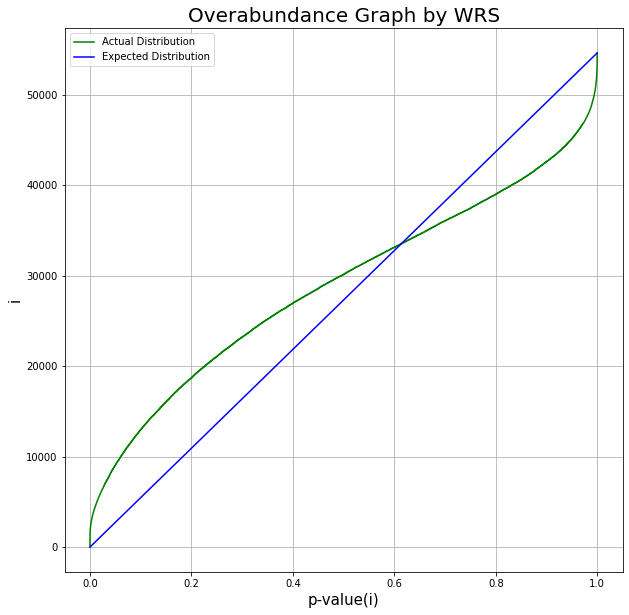

In [423]:
# Note: we want a one-sided pval. and so, adjust to the wanted side of the statistic
WRS_df['p-value'] = WRS_df['p-value'] / 2

opposite_side_mask = WRS_df['WRS Z Value'] < 0
WRS_df['p-value'][opposite_side_mask] = 1 - WRS_df['p-value'][opposite_side_mask]

# Plot the overabundance graph
overabundance_graph(pvals=WRS_df['p-value'], title='WRS')

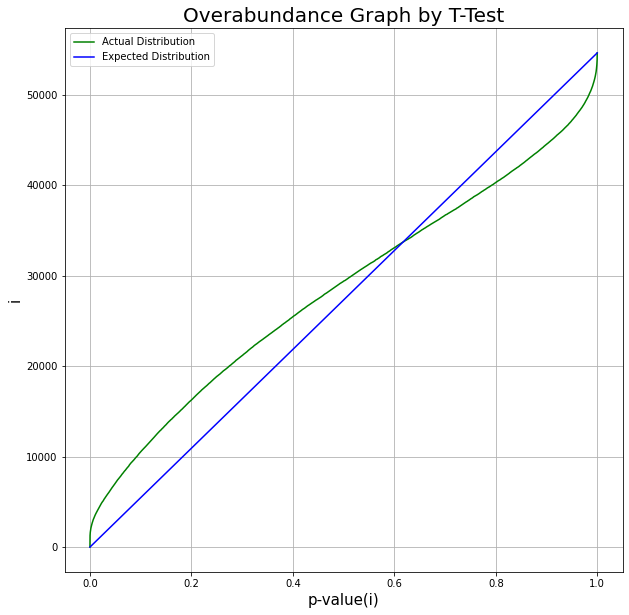

In [424]:
# Note: we want a one-sided pval. and so, adjust to the wanted side of the statistic
t_test_df['p-value'] = t_test_df['p-value'] / 2

opposite_side_mask = t_test_df['t_test'] < 0
t_test_df['p-value'][opposite_side_mask] = 1 - t_test_df['p-value'][opposite_side_mask]

# Plot the overabundance graph
overabundance_graph(pvals=t_test_df['p-value'], title='T-Test')

In [425]:
def get_fdr_for_given_options(fdr_threshold_list:list, t_test_df, WRS_df):
    result_list = []
    for pvals, test_type in [(t_test_df['p-value'], 'T-test'), (WRS_df['p-value'], 'WRS')]:
        print(test_type)
        data_frame_value_list = []
        sorted_pvals = np.sort(pvals)
        for fdr in fdr_threshold_list:
            curr_report = compute_fdr(sorted_pvals=sorted_pvals, fdr_threshold=fdr)
            data_frame_value_list.append([test_type, curr_report, fdr])
        score_df  = pd.DataFrame(data_frame_value_list, columns = ['test_type','number of genes', 'fdr score'])
        result_list.append(score_df)
    return result_list

In [426]:
results_list = get_fdr_for_given_options([0.05, 0.01, 0.005], t_test_df, WRS_df)

T-test
Computing FDR...
Computing FDR...
Computing FDR...
WRS
Computing FDR...
Computing FDR...
Computing FDR...


In [427]:
T_test_result = results_list[0]
T_test_result

,test_type,number of genes,fdr score
0,T-test,2104,0.050
1,T-test,1305,0.010
2,T-test,1104,0.005


In [428]:
WRS_results = results_list[1]
WRS_results

,test_type,number of genes,fdr score
0,WRS,2808,0.050
1,WRS,1601,0.010
2,WRS,1323,0.005


### 3.e.2) Select any 3 differentially expressed genes, from D (which was defined in 3d), and produce a graphical representation of their expression patterns that demonstrates the observed DE.

In [438]:
# We will choose the genes from the  "most significant df" we constructed earlier. brought hee again as a reminder
most_significant_df  = pd.concat([overexpressed_n_significant_df, underexpressed_n_significant_df])
D_new = most_significant_df.sample(n=3)
D_new = df[D_new.index]
D_new

,216016_at,235568_at,236751_at
1,4.102953,6.122200,8.459255
2,3.492796,7.005672,8.478768
3,2.836530,5.430905,7.940169
4,2.833555,5.631828,9.091607
5,3.722507,5.841998,8.426678
...,...,...,...
95,3.545779,6.420741,7.028999
96,5.391723,7.258914,8.030831
97,5.874928,7.980140,7.567502
98,4.729367,6.751183,9.275417


In [439]:
def plot_expression_patterns(g):
    """
    Plot differential expression (DE) values observed for each gene in H vs M
    """
    M_samples = df['Class'] == 'M'
    H_samples = df['Class'] == 'H'
    sns.kdeplot(g[M_samples], shade=True, label='M')
    sns.kdeplot(g[H_samples], shade=True, label='H')
    plt.title(g.name)
    plt.xlabel('Differential Expression Levels')
    plt.ylabel('Density')
    plt.legend()
    plt.grid()
    plt.show()
    return 

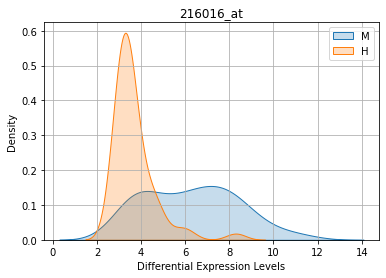

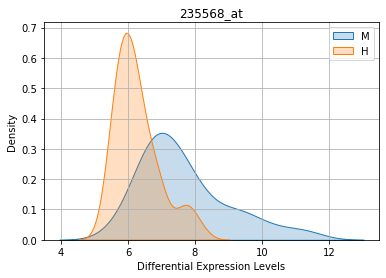

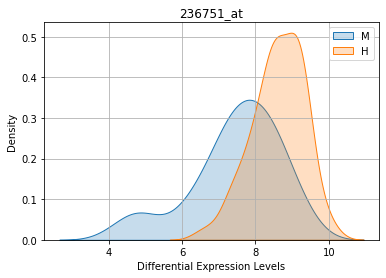

0
216016_at    None
235568_at    None
236751_at    None
dtype: object

In [440]:
D_new.apply(plot_expression_patterns, axis=0)

### 3.e.3) Draw a heatmap representation of the expression values of the genes in D (from 3d), across the entire cohort (all samples). Order the genes and the samples to produce the maximal visual effect.

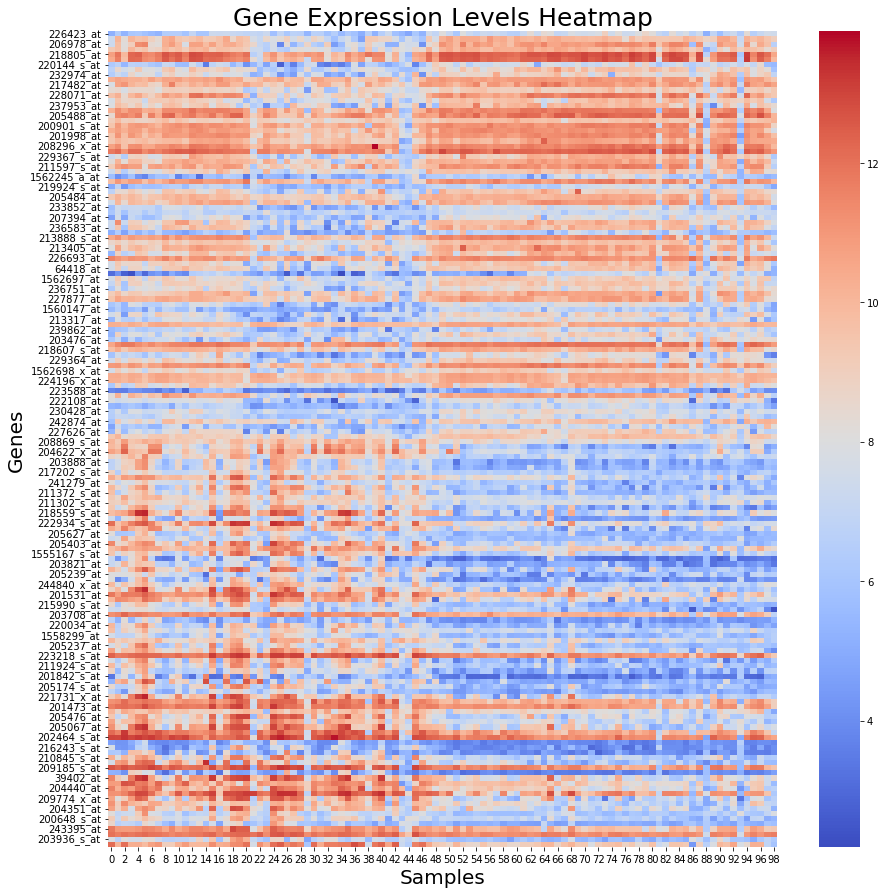

In [443]:
# slice original dataframe by expression
overexpressed = df[over_significant_df.index]
underexpressed = df[under_significant_df.index]

# slice by healthy and ill patients
H_overexpressed = overexpressed.T[df[df['Class'] == 'H'].index]
H_underexpressed = underexpressed.T[df[df['Class'] == 'H'].index]
M_overexpressed = overexpressed.T[df[df['Class'] == 'M'].index]
M_underexpressed = underexpressed.T[df[df['Class'] == 'M'].index]

# reorder the matrix
upper_genes_for_matrix = pd.concat([M_underexpressed, H_underexpressed], axis=1, ignore_index=True)
lower_genes_for_matrix = pd.concat([M_overexpressed, H_overexpressed], axis=1, ignore_index=True)
all_genes_for_matrix = pd.concat([upper_genes_for_matrix, lower_genes_for_matrix])

# plot figure
plt.figure(0, figsize = (15, 15))
sns.heatmap(all_genes_for_matrix, cmap="coolwarm")
plt.title('Gene Expression Levels Heatmap', fontsize=25)
plt.xlabel('Sample #', fontsize=20)
plt.ylabel('Gene Names', fontsize=20)
plt.show()